In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Sales = pd.read_csv('SalesData.csv')

In [3]:
Sales.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53


# 1. Compare Sales by region for 2016 with 2015 using bar chart


In [4]:
Sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3709 entries, 0 to 3708
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AccountId           3709 non-null   int64  
 1   AccountName         3709 non-null   object 
 2   Region              3709 non-null   object 
 3   Division            3709 non-null   object 
 4   City                3709 non-null   object 
 5   State               3709 non-null   object 
 6   Tier                3709 non-null   object 
 7   Month               3709 non-null   object 
 8   Sales2015           3709 non-null   float64
 9   Sales2016           3709 non-null   float64
 10  Units2015           3709 non-null   float64
 11  Units2016           3709 non-null   float64
 12  TargetAchevied2015  3709 non-null   float64
 13  TargetAchevied2016  3709 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 405.8+ KB


In [5]:
Sales_Region = Sales.groupby(by = ['Region'])[['Sales2015','Sales2016']].sum()

In [6]:
Sales_Region.reset_index()

,Region,Sales2015,Sales2016
0,Central,7.891729e+06,9.787809e+06
1,East,9.512916e+06,1.266723e+07
2,West,5.349745e+06,7.209689e+06


<Figure size 1200x600 with 0 Axes>

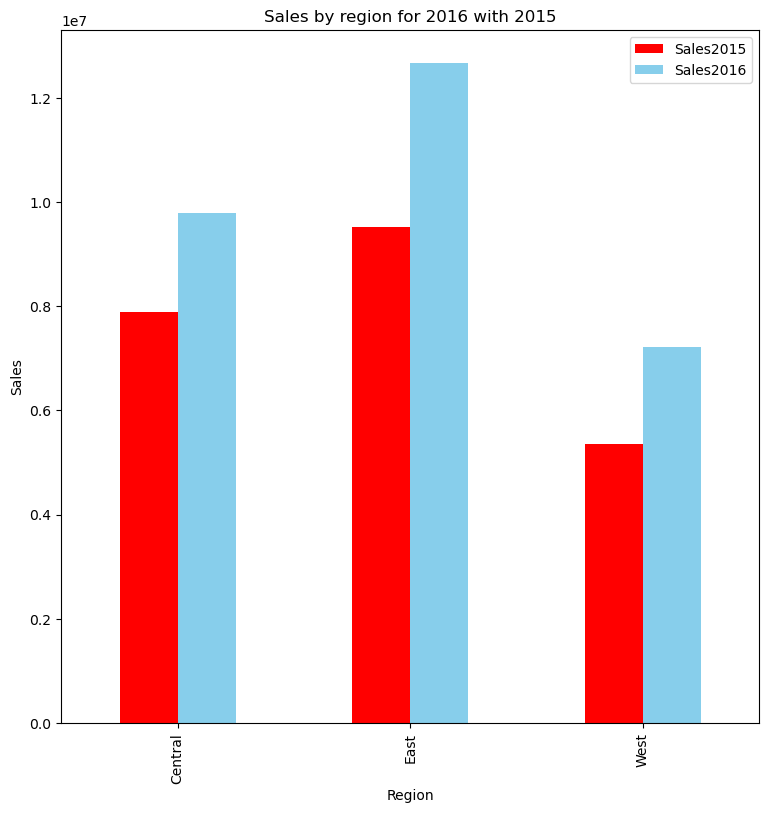

In [7]:
plt.figure(figsize=(12,6))
Sales_Region.plot(kind='bar',figsize=(9,9), color = ['red', 'skyblue'])
plt.ylabel('Sales')
plt.title('Sales by region for 2016 with 2015')
plt.show()


# #2. What are the contributing factors to the sales for each region in 2016. Visualize it using a Pie Chart

In [8]:
Sales_pie = Sales.groupby('Region').Sales2016.sum()
Sales_pie

Region
Central    9.787809e+06
East       1.266723e+07
West       7.209689e+06
Name: Sales2016, dtype: float64

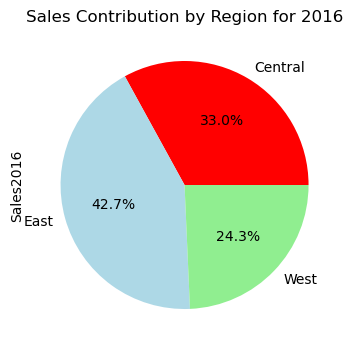

In [9]:
plt.figure(figsize=(4,6))
Sales_pie.plot(kind = 'pie', autopct='%1.1f%%', colors=['red', 'lightblue', 'lightgreen'])
plt.title('Sales Contribution by Region for 2016')
plt.show()

## 3. Compare the total sales of 2015 and 2016 with respect to Region and Tiers

In [10]:
Sales_region_tier = Sales.groupby(by = ['Region','Tier'])[['Sales2015','Sales2016']].sum()
Sales_region_tier

Sales2015     Sales2016
Region  Tier                            
Central High  4.798698e+06  6.026043e+06
        Low   9.434397e+05  1.132833e+06
        Med   2.068226e+06  2.632181e+06
        Out   8.136489e+04 -3.248530e+03
East    High  6.102946e+06  7.817151e+06
        Low   9.016658e+05  1.144930e+06
        Med   2.470998e+06  3.705150e+06
        Out   3.730655e+04  0.000000e+00
West    High  2.944789e+06  3.768038e+06
        Low   6.710644e+05  1.099502e+06
        Med   1.718476e+06  2.342149e+06
        Out   1.541508e+04  0.000000e+00

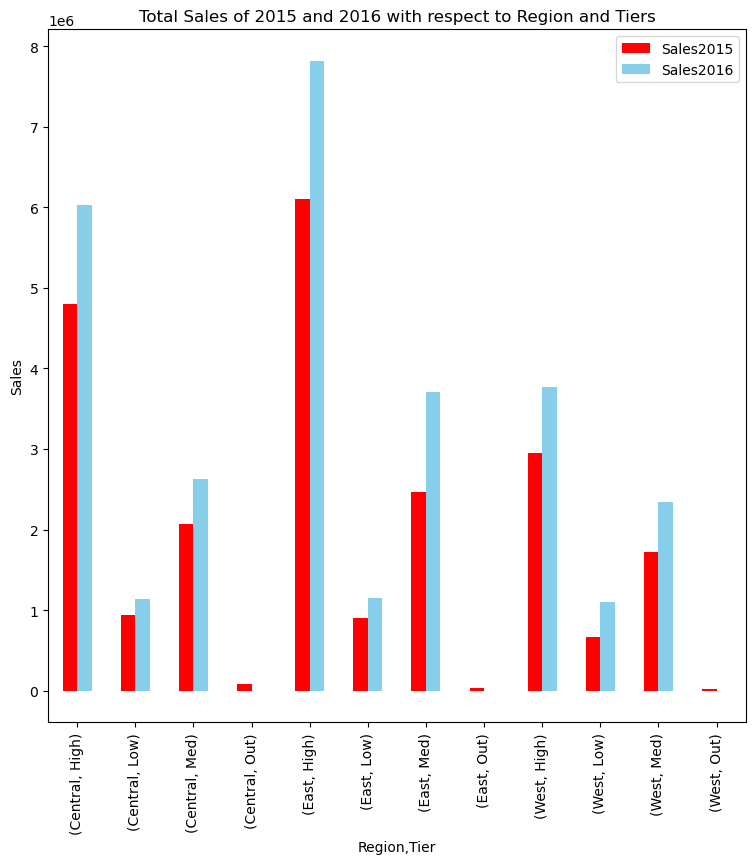

In [11]:
Sales_region_tier.plot(kind='bar',figsize=(9,9), color = ['red', 'skyblue'])
plt.ylabel('Sales')
plt.title('Total Sales of 2015 and 2016 with respect to Region and Tiers')
plt.show()

## 4. In East region, which state registered a decline in 2016 as compared to 2015

In [12]:
State_sales =Sales.groupby(by = ['Region','State'])[['Sales2015','Sales2016']].sum()
State_sales

Sales2015     Sales2016
Region  State                            
Central AL     5.091037e+05  5.958284e+05
        AR     2.133175e+05  2.276081e+05
        IL     6.217938e+05  7.843073e+05
        IN     3.166781e+05  5.996723e+05
        KY     5.312149e+05  6.332189e+05
        LA     4.793662e+05  6.803033e+05
        MI     5.686517e+05  7.072480e+05
        MS     3.045782e+05  2.204109e+05
        OH     9.276875e+05  1.221085e+06
        OK     2.484607e+05  3.396445e+05
        PA     3.002670e+05  2.877924e+05
        TN     4.370386e+05  5.522301e+05
        TX     1.712440e+06  2.013116e+06
        WI     3.044250e+05  4.403802e+05
        WV     4.167062e+05  4.849640e+05
East    CT     1.972028e+05  3.235023e+05
        DC     2.167240e+05  2.574217e+05
        FL     1.660162e+06  2.508232e+06
        GA     6.815465e+05  9.469198e+05
        MA     4.192788e+05  6.870964e+05
        MD     5.273091e+05  7.500088e+05
        ME     7.742564e+04  1.836730e+05
        NC     1.292802e+06  1.610521e+06
        NH     1.364194e+05  1.447175e+05
        NJ     5.204193e+05  7.822892e+05
        NY     1.725415e+06  1.703136e+06
        PA     7.850928e+05  8.943195e+05
        RI     1.563118e+05  1.624546e+05
        SC     2.478118e+05  4.634141e+05
        TN     4.967700e+04  7.010941e+04
        VA     8.193191e+05  1.179415e+06
West    AZ     3.889876e+05  5.195079e+05
        CA     1.891621e+06  2.396883e+06
        CO     4.023385e+05  5.046537e+05
        IA     1.022714e+05  1.461604e+05
        ID     9.237388e+04  1.157684e+05
        IL     9.375350e+04  1.224796e+05
        KS     2.284577e+05  2.850208e+05
        MN     3.142297e+05  3.220523e+05
        MO     4.444618e+05  7.241663e+05
        NE     6.981622e+04  8.587284e+04
        NM     8.828041e+04  1.325122e+05
        NV     2.057940e+05  2.814234e+05
        OR     2.629237e+05  4.383578e+05
        SD     7.549041e+04  1.662565e+05
        TX     2.530734e+05  3.495791e+05
        UT     1.133622e+05  1.732097e+05
        WA     3.225094e+05  4.457855e+05

In [13]:
Sales_east= State_sales.loc['East']
Sales_east

,Sales2015,Sales2016
State,,
CT,197202.790,323502.31
DC,216723.950,257421.69
FL,1660162.000,2508232.28
GA,681546.460,946919.77
MA,419278.750,687096.45
MD,527309.060,750008.79
ME,77425.640,183673.05
NC,1292801.640,1610521.00
NH,136419.380,144717.51


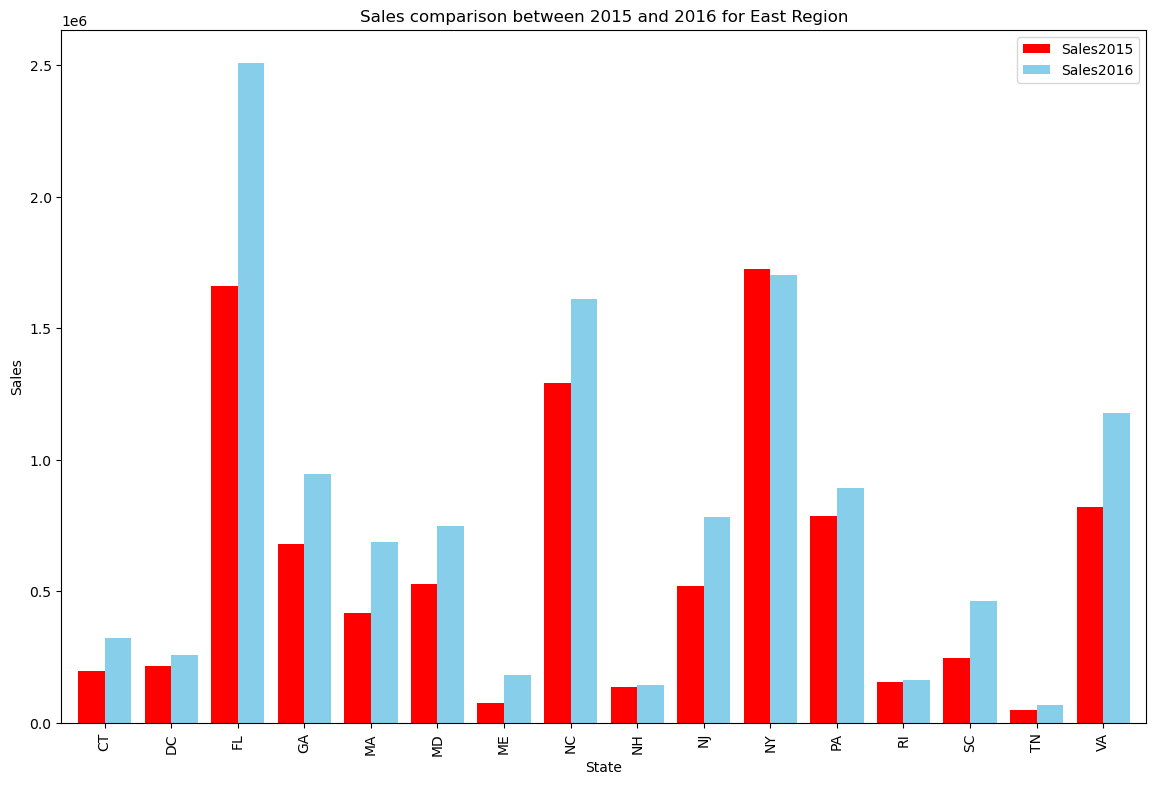

In [14]:
Sales_east.plot(kind='bar',figsize=(14,9),width=0.8, color = ['red', 'skyblue'])
plt.ylabel("Sales")
plt.title('Sales comparison between 2015 and 2016 for East Region')
plt.show()


## 5. In all the High tier, which Division saw a decline in number of units sold in 2016 compared to 2015?

In [15]:
Sales_div_tier=Sales.groupby(by = ['Tier','Division'])[['Units2015','Units2016']].sum()
Sales_div_tier

Units2015  Units2016
Tier Division                           
High BIG APPLE       180.8330   231.0000
     CHARGERS        123.6666   164.4999
     CONGRESSIONAL   164.5003   205.0000
     DIAMONDBACK     153.3334   176.6667
     EMPIRE          414.3332   449.3332
...                       ...        ...
Out  SYNERGY           3.0000     0.0000
     THE CAROLINAS     2.0000     0.0000
     VICTORY           1.0000     0.0000
     WOLVERINE         1.0000     0.0000
     WRANGLER         13.0000     0.0000

[96 rows x 2 columns]

In [16]:
High_tier = Sales_div_tier.loc['High']
High_tier

,Units2015,Units2016
Division,,
BIG APPLE,180.8330,231.0000
CHARGERS,123.6666,164.4999
CONGRESSIONAL,164.5003,205.0000
DIAMONDBACK,153.3334,176.6667
EMPIRE,414.3332,449.3332
GRIDIRON,213.6673,246.1675
GULF STREAM,185.0000,301.0009
HAILSTORM,187.8338,247.0003
KINETIC,214.3334,244.5001


<Axes: xlabel='Division'>

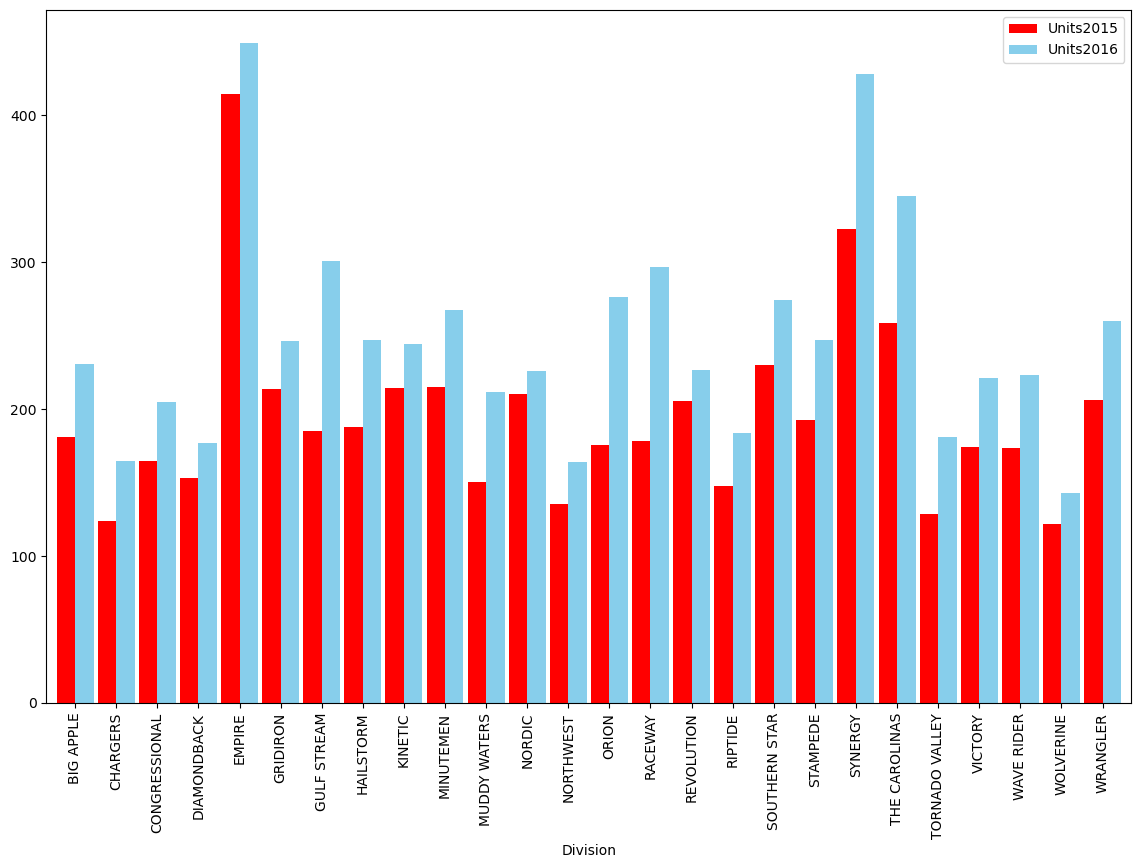

In [17]:
High_tier.plot(kind='bar',figsize=(14,9),width=0.9, color = ['red', 'skyblue'])

# #6. Create a new column Qtr using numpy.where() or any suitable utility in the imported 
dataset. The Quarters are based on months and defined as -
• Jan - Mar : Q1
• Apr - Jun : Q2
• Jul - Sep : Q3
• Oct - Dec : Q4 

In [18]:
Month=Sales['Month']

In [19]:
quarter=[]
for x in Month:
    if x in ['Jan','Feb','Mar']:
        quarter.append('Q1')
    elif x in ["Apr","May","Jun"]:
        quarter.append("Q2")
    elif x in ["Jul","Aug","Sep"]:
        quarter.append("Q3")
    else:
        quarter.append("Q4")

In [20]:
quarter

['Q3',
 'Q4',
 'Q2',
 'Q1',
 'Q3',
 'Q3',
 'Q1',
 'Q1',
 'Q1',
 'Q3',
 'Q1',
 'Q1',
 'Q3',
 'Q1',
 'Q3',
 'Q4',
 'Q2',
 'Q4',
 'Q2',
 'Q2',
 'Q4',
 'Q2',
 'Q2',
 'Q2',
 'Q4',
 'Q4',
 'Q1',
 'Q2',
 'Q3',
 'Q1',
 'Q1',
 'Q1',
 'Q1',
 'Q2',
 'Q3',
 'Q4',
 'Q2',
 'Q4',
 'Q1',
 'Q4',
 'Q4',
 'Q4',
 'Q1',
 'Q1',
 'Q2',
 'Q2',
 'Q2',
 'Q1',
 'Q4',
 'Q3',
 'Q4',
 'Q1',
 'Q1',
 'Q3',
 'Q2',
 'Q3',
 'Q1',
 'Q2',
 'Q3',
 'Q3',
 'Q4',
 'Q3',
 'Q1',
 'Q4',
 'Q4',
 'Q3',
 'Q1',
 'Q3',
 'Q4',
 'Q1',
 'Q3',
 'Q1',
 'Q3',
 'Q2',
 'Q1',
 'Q3',
 'Q3',
 'Q2',
 'Q4',
 'Q1',
 'Q2',
 'Q4',
 'Q2',
 'Q3',
 'Q2',
 'Q2',
 'Q4',
 'Q3',
 'Q4',
 'Q3',
 'Q2',
 'Q3',
 'Q1',
 'Q3',
 'Q4',
 'Q4',
 'Q2',
 'Q3',
 'Q2',
 'Q4',
 'Q1',
 'Q1',
 'Q4',
 'Q1',
 'Q2',
 'Q1',
 'Q2',
 'Q4',
 'Q4',
 'Q3',
 'Q1',
 'Q1',
 'Q1',
 'Q3',
 'Q3',
 'Q2',
 'Q4',
 'Q3',
 'Q2',
 'Q1',
 'Q4',
 'Q2',
 'Q4',
 'Q1',
 'Q3',
 'Q3',
 'Q3',
 'Q4',
 'Q4',
 'Q4',
 'Q2',
 'Q1',
 'Q4',
 'Q1',
 'Q3',
 'Q3',
 'Q1',
 'Q4',
 'Q3',
 'Q2',
 'Q1',
 'Q1',
 'Q2',

In [21]:
Sales['Qtr']=pd.Series(quarter)

## 7. Compare Qtr wise sales in 2015 and 2016 in a bar plot

In [22]:
Qtr_sales=Sales.groupby(by =['Qtr'])[['Sales2015','Sales2016']].sum()

In [23]:
Qtr_sales

,Sales2015,Sales2016
Qtr,,
Q1,5.485800e+06,6.997953e+06
Q2,5.390862e+06,7.237361e+06
Q3,6.164094e+06,7.861546e+06
Q4,5.713634e+06,7.567868e+06


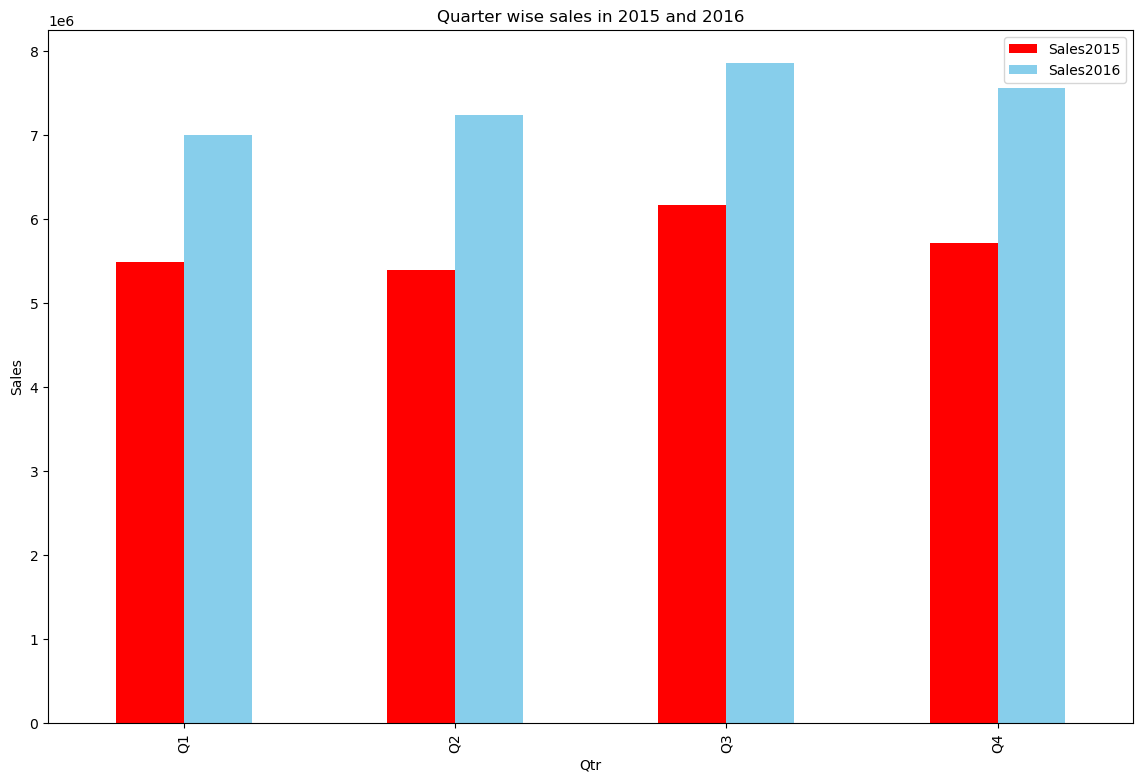

In [24]:
Qtr_sales.plot(kind='bar',figsize=(14,9), color = ['red','skyblue'])
plt.ylabel('Sales')
plt.title('Quarter wise sales in 2015 and 2016')
plt.show()

## 8. Determine the composition of Qtr wise sales in and 2016 with regards to all the Tiers in a pie chart.

In [25]:
qtr_pivot= Sales.pivot_table(index='Qtr',columns='Tier',values='Sales2016')
qtr_pivot

Tier,High,Low,Med,Out
Qtr,,,,
Q1,7974.677515,5516.469593,7654.041681,0.000000
Q2,8752.018136,5031.608757,8758.157542,0.000000
Q3,9334.404693,5446.422671,8197.976091,-360.947778
Q4,9386.142545,5052.104694,8307.596804,0.000000


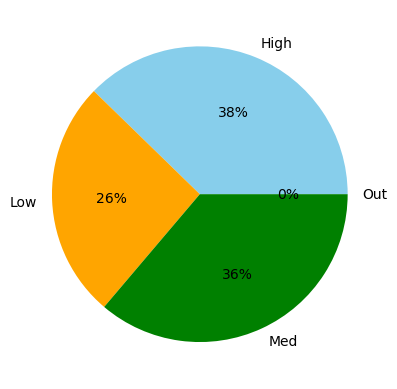

In [26]:
plt.pie(x=qtr_pivot.loc["Q1",:],autopct="%1.0f%%",labels=["High","Low","Med","Out"],colors=['skyblue', 'orange', 'green'])
plt.show()

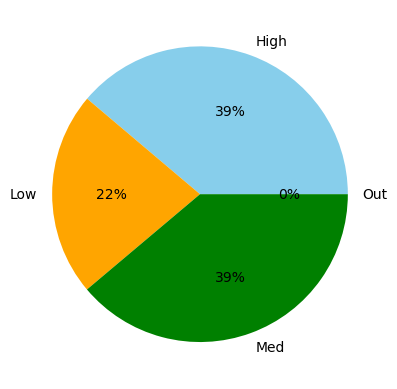

In [27]:
plt.pie(x=qtr_pivot.loc["Q2",:],autopct="%1.0f%%",labels=["High","Low","Med","Out"],colors=['skyblue', 'orange', 'green'])
plt.show()

In [28]:
qtr_pivot= np.abs(Sales.pivot_table(index='Qtr',columns='Tier',values='Sales2016'))

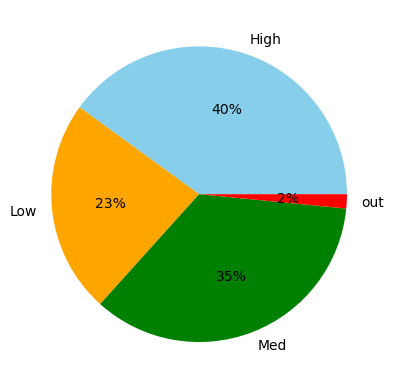

In [29]:
plt.pie(x=qtr_pivot.loc['Q3',:],autopct="%1.0f%%",labels=["High","Low","Med","out"],colors=['skyblue', 'orange', 'green','red'])
plt.show()

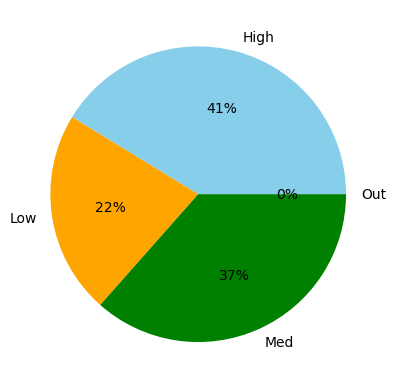

In [30]:
plt.pie(x=qtr_pivot.loc["Q4",:],autopct="%1.0f%%",labels=["High","Low","Med","Out"],colors=['skyblue', 'orange', 'green'])
plt.show()